In [1]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy
import spectral

# module that is useful for reloading packages
import importlib

# Scripts associated with the SML4SI textbook
import hsi_classificatiom as hc


ModuleNotFoundError: No module named 'hsi_classificatiom'

# Part 1: Open the image and load the data as a numpy array.

In [71]:
fdir = 'C:/Users/wb8by/Documents/GitHub/Machine-Learning-for-Spectral-Imaging/Book_Modules/'

# To download and use the Washington DC image:
#hsi_data.download('WashingtonDC')
#fname = fdir+'spectral_images/WashingtonDC_Ref_156bands/WashingtonDC_Ref_156bands'

# To download and use the polymers image:
#hsi_data.download('MicroscenePolymers')
fname = fdir+'/spectral_images/Microscene_Polymers/reflectance_image_polymers'

In [72]:
# Open the image and read into an array
im = spectral.envi.open(fname+'.hdr', fname)
wl = np.asarray(im.bands.centers)
# Load the image into memory
im.Arr = im.load()
print(f'Shape of Im.Arr = {im.Arr.shape}')
im.List = np.reshape(im.Arr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of im.List = {im.List.shape}')

Shape of Im.Arr = (852, 384, 452)
Shape of im.List = (327168, 452)


Loading groundtruth...
Total time: 0.32 seconds
Training...
Total time: 1.11 seconds
Predicting...
Total time: 17.99 seconds


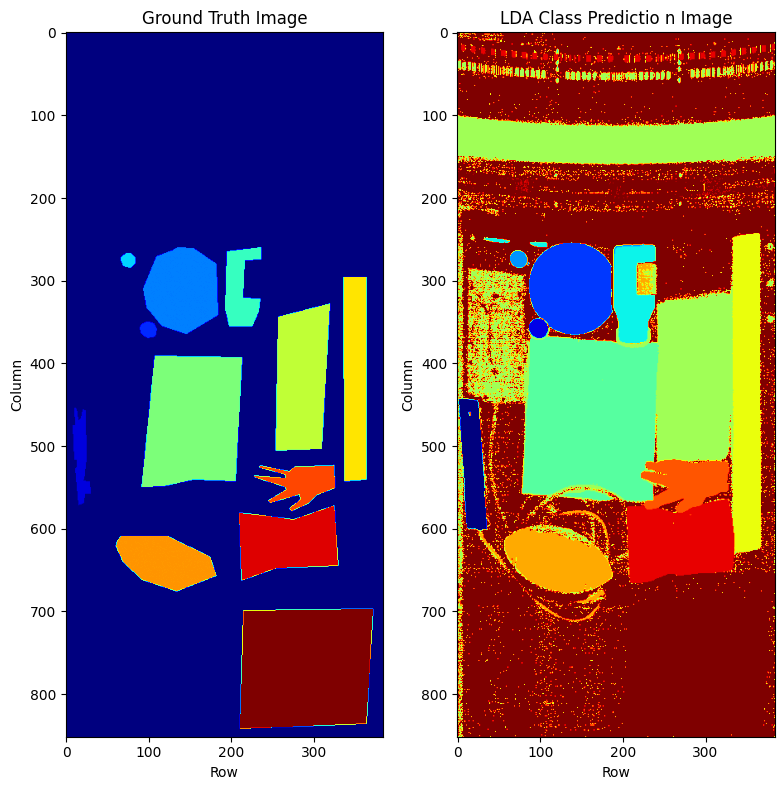

In [90]:
importlib.reload(hc)

# load the image data
cl = hc.GaussianClassification(im)

# load the ground truth data
fname = fdir+'ground_truth_images/reflectance_image_polymers_surfaces.txt'
cl.load_gt(fname, verbose=True)

# train the classifiers (compute means and states)
cl.train(verbose=True)

# predict class labels
cl.predict(verbose=True)

cl.plot_class_sideBySide(fs=8)

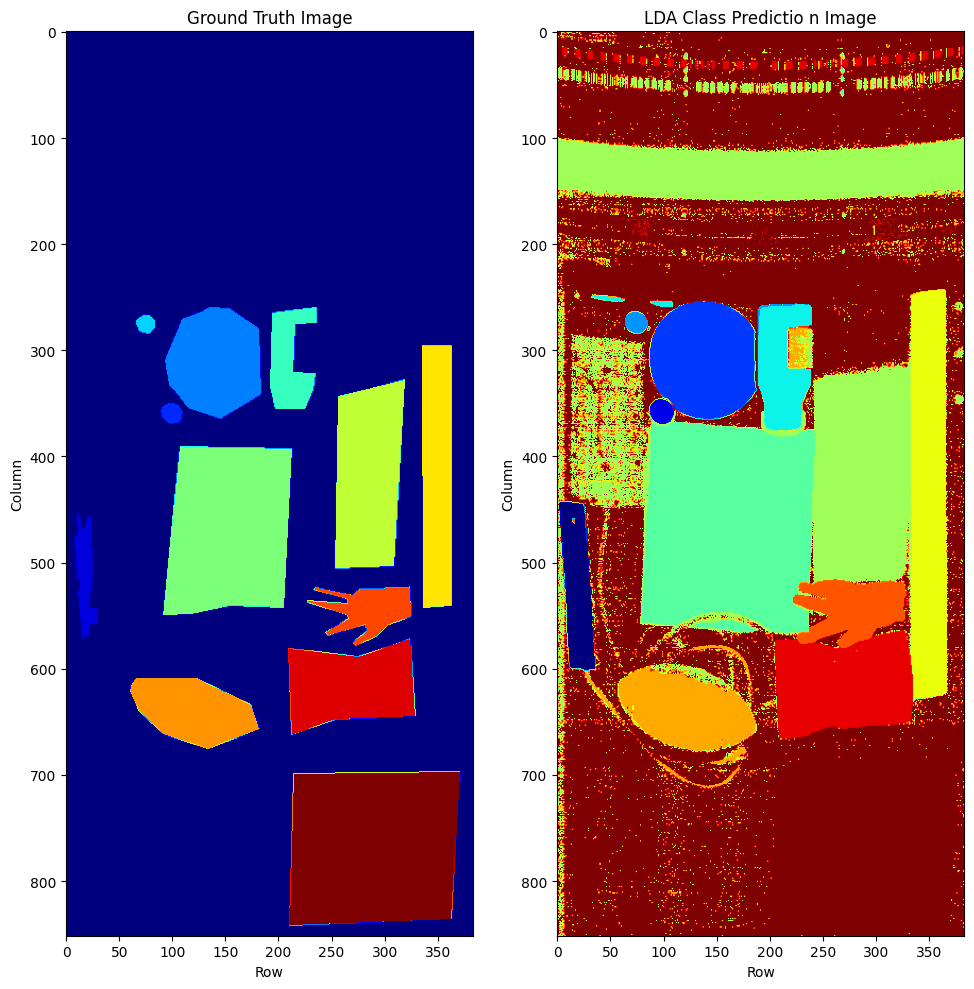

In [74]:
cl.plot_class_sideBySide()

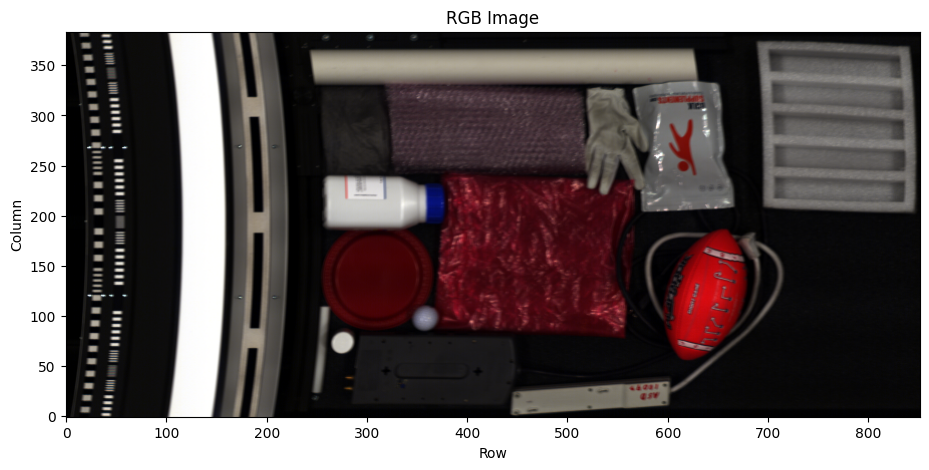

In [75]:
cl.plot_RGB()

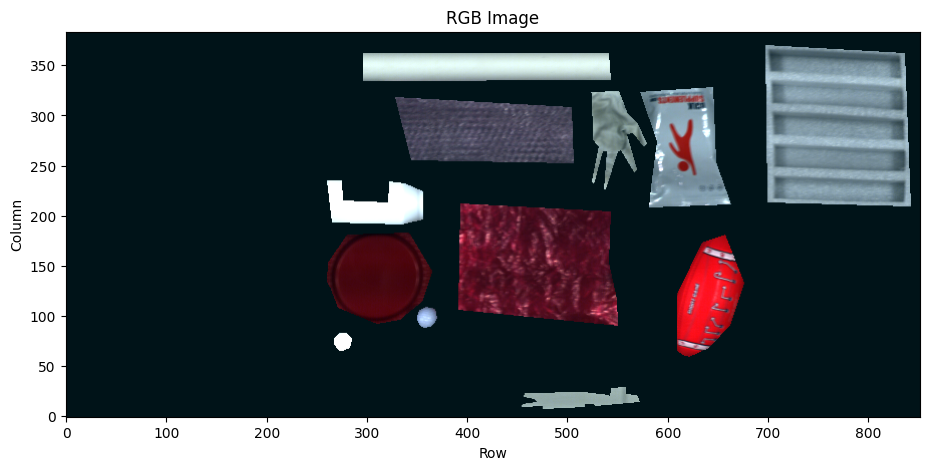

In [76]:
cl.plt_RGB_classes()

# PART 2: Viewing a scatterplot of the hyperspectral image.

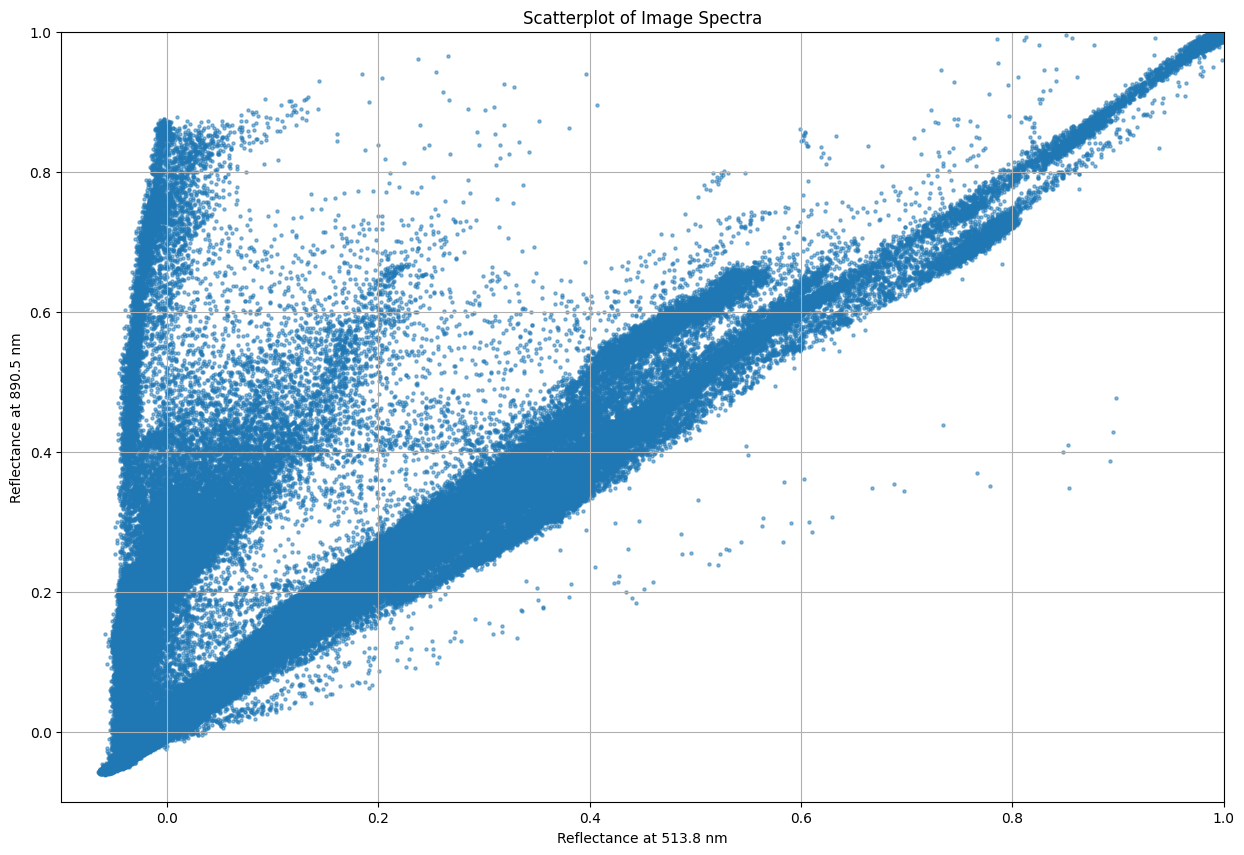

In [77]:
cl.plt_scatter()
plt.xlim([-0.1,1])
plt.ylim([-0.1,1]);

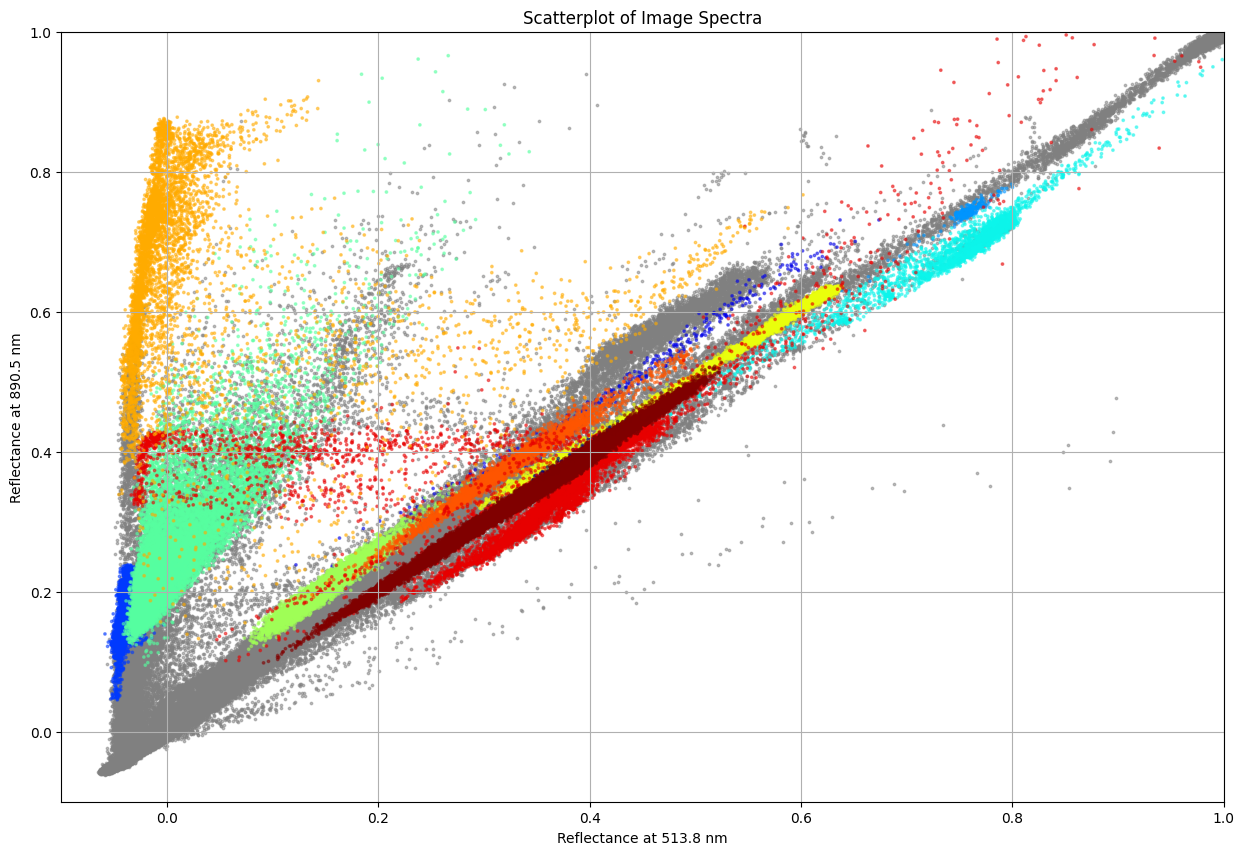

In [78]:
cl.plt_scatter_gt()
plt.xlim([-0.1,1])
plt.ylim([-0.1,1]);

# Part 3: Examining Individual Classes

In [79]:
cl.class_names

['surge_protector_hard',
 'ping_pong_ball',
 'red_lid',
 'medicine_bottle_cap',
 'plastic_bottle',
 'red_bubble_wrap',
 'clear_bubble_wrap',
 'PVC_plumbing_pipe',
 'polymer_football',
 'gloave',
 'foil_bag',
 'foam_packaging']

##  Part 4: Examining the means and covariances:

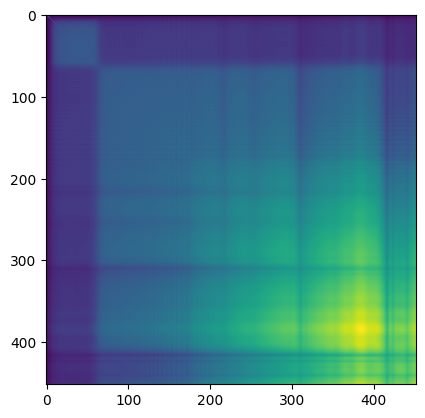

In [80]:
plt.imshow(cl.C);

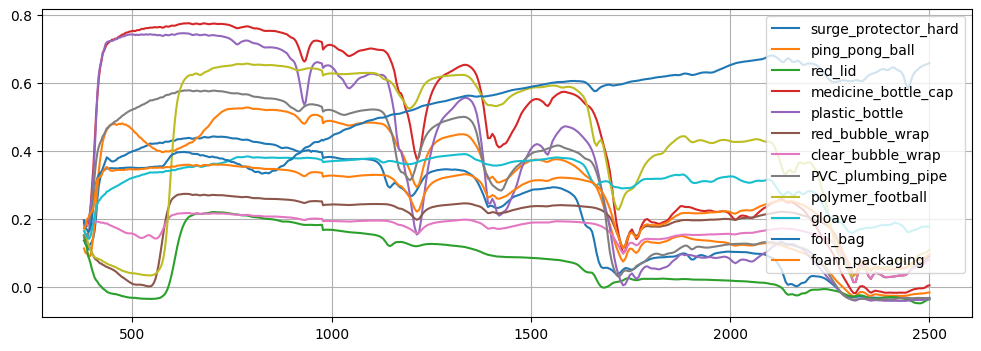

In [81]:
cl.plt_class_means()

In [96]:
import importlib
from hsiViewer import hsi_layers_viewer as hlv
importlib.reload(hlv)
layers = {
    'Ground Truth': cl.gt_im,
    'LDA Classification': cl.LDA_class_image
}
hlv.viewer(im, layers)

x,y = [651,123]
x,y = [678,140]
x,y = [541,112]
x,y = [686,129]
